In [1269]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import duckdb
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.api import OLS
from scipy.stats import bootstrap
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


## Poverty

In [1270]:
# importing cleaned csv from previous phase
poverty_concat = pd.read_csv('poverty_concat.csv')
poverty_concat.head()

,State,TotalPop,PovertyTotal,PovertyPercent,Year
0,Alabama,4751,796,16.7,2013
1,Alaska,696,76,10.9,2013
2,Arizona,6645,1345,20.2,2013
3,Arkansas,2940,504,17.1,2013
4,California,38050,5675,14.9,2013


## Income 1984-2018

In [1271]:
# importing cleaned csv from previous phase
income_df = pd.read_csv('income_df.csv')
income_df.head()

,State,2018,2017,2016,2015,2014,2013,2013.1,2012,2011,...,1993,1992,1991,1990,1989,1988,1987,1986,1985,1984
0,Alabama,49936.0,51113.0,47221.0,44509.0,42278.0,47320.0,41381.0,43464.0,42590.0,...,25082.0,25808.0,24346.0,23357.0,21284.0,19948.0,19734.0,19132.0,18333.0,17310.0
1,Alaska,68734.0,72231.0,75723.0,75112.0,67629.0,72472.0,61137.0,63648.0,57431.0,...,42931.0,41802.0,40612.0,39298.0,36006.0,33103.0,33233.0,31356.0,34782.0,32356.0
2,Arizona,62283.0,61125.0,57100.0,52248.0,49254.0,52611.0,50602.0,47044.0,48621.0,...,30510.0,29358.0,30737.0,29224.0,28552.0,26435.0,26749.0,25500.0,23877.0,21425.0
3,Arkansas,49781.0,48829.0,45907.0,42798.0,44922.0,39376.0,39919.0,39018.0,41302.0,...,23039.0,23882.0,23435.0,22786.0,21433.0,20172.0,18827.0,18730.0,17451.0,15674.0
4,California,70489.0,69759.0,66637.0,63636.0,60487.0,60794.0,57528.0,57020.0,53367.0,...,34073.0,34903.0,33664.0,33290.0,33009.0,30287.0,30146.0,29010.0,26981.0,25287.0


In [1272]:
# importing cleaned csv from previous phase
income_melt = pd.read_csv('income_melt_df.csv')
income_melt.head()

,State,Year,Median_Income
0,Alabama,2018,49936.0
1,Alaska,2018,68734.0
2,Arizona,2018,62283.0
3,Arkansas,2018,49781.0
4,California,2018,70489.0


# Unemployment

In [1273]:
# importing cleaned csv from previous phase
job_df = pd.read_csv('job_df.csv')
job_melt = pd.read_csv('job_melt.csv')

## Crime 1979-2022

In [1274]:
# importing cleaned csv from previous phase
crime_df = pd.read_csv('crime_df.csv')
crime_df

,Year,State_Abbreviation,State,Population,Violent_Crime,Homicide,Rape,Robbery,Aggravated_Assault,Property_Crime,Burglary
0,1979,AK,Alaska,406000,1994,54,292,445,1203,23193,5616
1,1979,AL,Alabama,3769000,15578,496,1037,4127,9918,144372,48517
2,1979,AR,Arkansas,2180000,7984,198,595,1626,5565,70949,21457
3,1979,AZ,Arizona,2450000,14528,219,1120,4305,8884,177977,48916
4,1979,CA,California,22696000,184087,2952,12239,75767,93129,1511021,496310
...,...,...,...,...,...,...,...,...,...,...,...
2239,2022,VA,Virginia,8683619,20624,641,2791,3360,13832,148845,10944
2240,2022,WA,Washington,7785786,29504,400,3208,6766,19130,262437,43987
2241,2022,WV,West Virginia,1775156,5213,95,909,210,3999,23663,3561
2242,2022,WI,Wisconsin,5892539,17889,322,2452,2350,12765,80703,9137


# Hypothesis 1:
### Income is a better predictor for robbery than burglary across the states.

### Train model for predicting robbery using income

In [1275]:
income_robbery = duckdb.sql('''SELECT  Robbery,C.State, C.Year, Median_Income
                            FROM crime_df AS C JOIN income_melt AS I
                            ON C.State = I.State AND C.Year = I.Year
                            ORDER BY C.Year ASC''').df()
income_robbery = pd.get_dummies(income_robbery,prefix='', \
                                prefix_sep='', columns=['State'], dtype=int, drop_first=True)
income_robbery.head()

,Robbery,Year,Median_Income,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,547,1984,32356.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3833,1984,17310.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1587,1984,15674.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4003,1984,21425.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,83924,1984,25287.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1276]:
X_inc_rob_train, X_inc_rob_test, y_inc_rob_train, y_inc_rob_test = \
                  train_test_split(income_robbery.iloc[:,1:],
                                   income_robbery['Robbery'], test_size=0.3, shuffle=False)
X_inc_rob_train = sm.add_constant(X_inc_rob_train)
inc_rob_model =sm.OLS(y_inc_rob_train, X_inc_rob_train).fit()
inc_rob_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Robbery   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     203.3
Date:                Thu, 21 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:48:46   Log-Likelihood:                -12665.
No. Observations:                1260   AIC:                         2.543e+04
Df Residuals:                    1208   BIC:                         2.570e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.052e+05   1.75e+05      0.601      0.548   -2.38e+05    4.49e+05
Year             -48.2927     88.778     -0.544      0.587    -222.469     125.883
Median_Income     -0.0896      0.073     -1.225      0.221      -0.233       0.054
Alaska         -3938.6943   2025.144     -1.945      0.052   -7911.884      34.495
Arizona         1410.7541   1628.548      0.866      0.387   -1784.343    4605.851
Arkansas       -3766.4762   1600.317     -2.354      0.019   -6906.186    -626.767
California      7.948e+04   1768.805     44.933      0.000     7.6e+04    8.29e+04
Colorado       -1423.9063   1789.294     -0.796      0.426   -4934.375    2086.563
Connecticut      654.6811   1994.790      0.328      0.743   -3258.956    4568.318
Delaware       -3857.7114   1754.645     -2.199      0.028   -7300.202    -415.220
Florida         3.364e+04   1603.309     20.980      0.000    3.05e+04    3.68e+04
Georgia         9127.7609   1632.680      5.591      0.000    5924.557    1.23e+04
Hawaii         -3615.1471   1905.102     -1.898      0.058   -7352.823     122.529
Idaho          -5556.5806   1628.121     -3.413      0.001   -8750.839   -2362.323
Illinois        2.786e+04   1733.039     16.075      0.000    2.45e+04    3.13e+04
Indiana          805.8084   1642.412      0.491      0.624   -2416.489    4028.106
Iowa           -4450.8625   1645.437     -2.705      0.007   -7679.095   -1222.630
Kansas         -3348.4027   1645.677     -2.035      0.042   -6577.106    -119.700
Kentucky       -2774.0674   1605.632     -1.728      0.084   -5924.205     376.071
Louisiana       2780.7335   1605.876      1.732      0.084    -369.882    5931.349
Maine          -5487.7169   1628.862     -3.369      0.001   -8683.429   -2292.005
Maryland        1.102e+04   2004.144      5.501      0.000    7092.002     1.5e+04
Massachusetts   3906.7616   1858.421      2.102      0.036     260.670    7552.854
Michigan        1.278e+04   1708.102      7.481      0.000    9427.985    1.61e+04
Minnesota       -661.6660   1816.302     -0.364      0.716   -4225.123    2901.791
Mississippi    -3573.7185   1622.849     -2.202      0.028   -6757.635    -389.802
Missouri        3117.8066   1643.731      1.897      0.058    -107.077    6342.690
Montana        -5919.7864   1605.562     -3.687      0.000   -9069.786   -2769.787
Nebraska       -4594.0111   1654.689     -2.776      0.006   -7840.394   -1347.629
Nevada          -888.3281   1728.822     -0.514      0.607   -4280.155    2503.499
New Hampshire  -4456.5554   1934.149     -2.304      0.021   -8251.219    -661.892
New Jersey      1.291e+04   2027.969      6.365      0.000    8928.610    1.69e+04
New Mexico     -3927.8848   1605.517     -2.446      0.015   -7077.796    -777.973
New York        6.177e+04   1674.747     36.883      0.000    5.85e+04    6.51e+04
North Caroli

In [1277]:
#make predictions
X_inc_rob_test = sm.add_constant(X_inc_rob_test)
inc_rob_preds = inc_rob_model.predict(X_inc_rob_test)
print( f"MAE for predicting robbery using income: {mean_absolute_error(y_inc_rob_test, inc_rob_preds)}")
print( f"RSME for predicting robbery using income: {root_mean_squared_error(y_inc_rob_test, inc_rob_preds)}")

MAE for predicting robbery using income: 3903.3094398751614
RSME for predicting robbery using income: 7759.480589023324


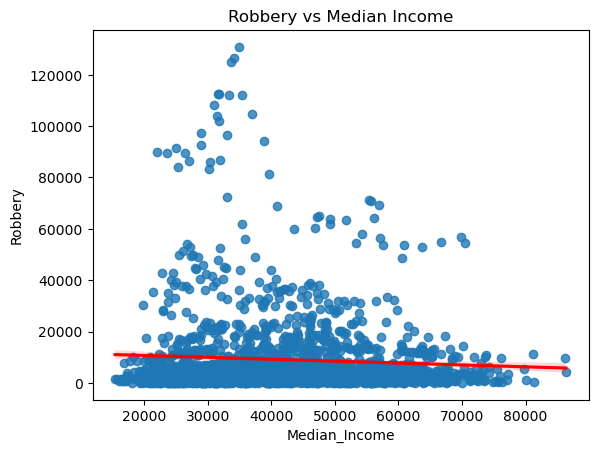

In [1278]:
sns.regplot(x = income_robbery['Median_Income'], y = income_robbery['Robbery'], line_kws = {"color":"red"});
plt.title("Robbery vs Median Income");

Since the y value rises exponentionally comparatively to the x value. We want to take a log transform of the robbery (y value). Also, based on where the linear regression line is positioned, we can see that the y values have a lot of outliers that can be dealt with using a log transform on the y axis.

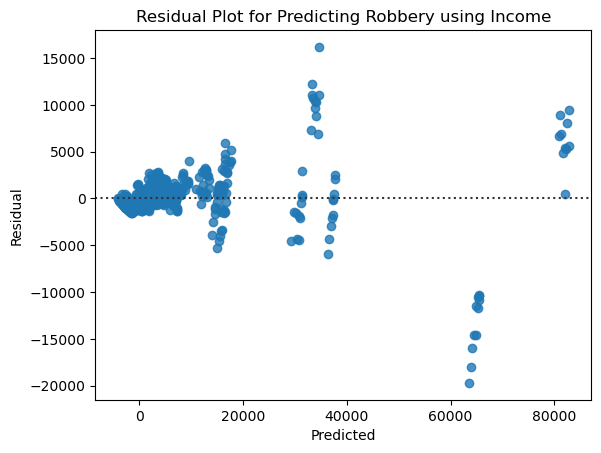

In [1279]:
inc_rob_df = pd.DataFrame({"Preds": inc_rob_preds, "Actual": y_inc_rob_test})
ax = sns.residplot(x = inc_rob_preds, y = y_inc_rob_test)
ax.set(xlabel = "Predicted", ylabel= "Residual", title = "Residual Plot for Predicting Robbery using Income");

We also see in the residual plot of the predicted robbery vs the actual predicted robbery that it is relatively hereteroskedastic, further evidencing our need for a log transform.

MAE for predicting robbery using income: 0.2995251380922235
RSME for predicting robbery using income: 0.3845879612087546


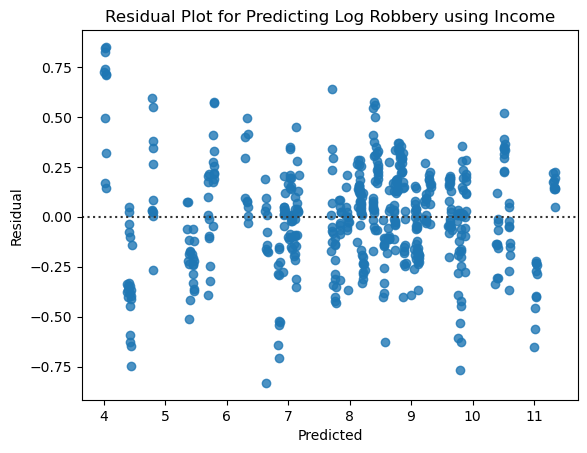

In [1280]:
income_robbery['log_robbery'] = np.log(income_robbery['Robbery'])

#print(income_robbery.iloc[:, 47:])
#print((income_robbery.iloc[:, 1:-1]).columns)

X_inc_rob_train, X_inc_rob_test, y_inc_rob_train, y_inc_rob_test = \
                  train_test_split(income_robbery.iloc[:,1:-1],
                                   income_robbery['log_robbery'], test_size=0.3, shuffle=False)
X_inc_rob_train = sm.add_constant(X_inc_rob_train)
inc_rob_model =sm.OLS(y_inc_rob_train, X_inc_rob_train).fit()

X_inc_rob_test = sm.add_constant(X_inc_rob_test)
inc_rob_preds = inc_rob_model.predict(X_inc_rob_test)
print( f"MAE for predicting robbery using income: {mean_absolute_error(y_inc_rob_test, inc_rob_preds)}")
print( f"RSME for predicting robbery using income: {root_mean_squared_error(y_inc_rob_test, inc_rob_preds)}")


inc_rob_df = pd.DataFrame({"Preds": inc_rob_preds, "Actual": y_inc_rob_test})
ax = sns.residplot(x = inc_rob_preds, y = y_inc_rob_test)
ax.set(xlabel = "Predicted", ylabel= "Residual", title = "Residual Plot for Predicting Log Robbery using Income");

After taking the log of robbery (y) we can see that the residual plot is much more random, rather than the fan shape (heteroskedastivity) that was represented in the previous graph. Moreover, the MAE and RMSE decreased exponentionally, showing that our model has become much more accurate, after we took the log or robbery. 

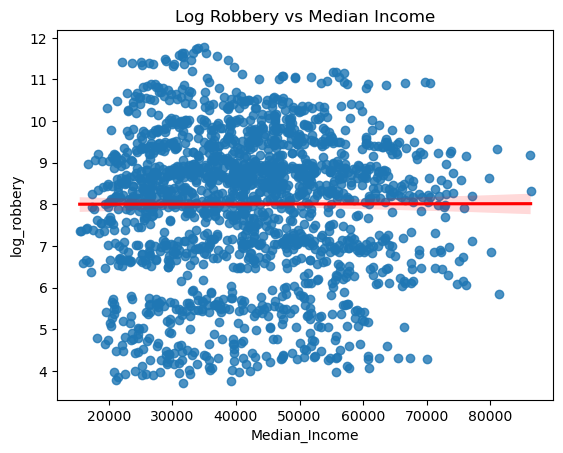

In [1281]:
sns.regplot(x = income_robbery['Median_Income'], y = income_robbery['log_robbery'], line_kws = {"color":"red"});
plt.title("Log Robbery vs Median Income");

In [1282]:
# for each of the states, get the predicted value and the actual value
X_inc_rob_test2 = X_inc_rob_test
X_inc_rob_test2['actual_robbery'] = y_inc_rob_test
X_inc_rob_test2['preds_robbery'] = inc_rob_preds
inc_rob_melt = pd.melt(X_inc_rob_test2, id_vars=['const','Year', 'Median_Income', 'actual_robbery','preds_robbery'], \
                       var_name = 'State', value_name='Binary')
inc_rob_melt = inc_rob_melt[ inc_rob_melt['Binary']==1]
inc_rob_melt.head()

,const,Year,Median_Income,actual_robbery,preds_robbery,State,Binary
40,1.0,2010,57848.0,6.386879,6.347382,Alaska,1
90,1.0,2011,57431.0,6.356108,6.355366,Alaska,1
140,1.0,2012,63648.0,6.445720,6.334015,Alaska,1
190,1.0,2013,61137.0,6.434547,6.351259,Alaska,1
229,1.0,2013,72472.0,6.434547,6.301135,Alaska,1


In [1283]:
twenty_states = pd.DataFrame(np.random.choice(inc_rob_melt['State'], size =20, replace = False))
#print(twenty_states)
chosen_stats_robbery = duckdb.sql(''' SELECT * FROM inc_rob_melt
                                  WHERE Year>=2014 AND Year<=2018 AND State IN (SELECT * FROM twenty_states)''').df()
chosen_stats_robbery.head()

,const,Year,Median_Income,actual_robbery,preds_robbery,State,Binary
0,1.0,2014,49254.0,8.736329,8.873140,Arizona,1
1,1.0,2015,52248.0,8.757784,8.866040,Arizona,1
2,1.0,2016,57100.0,8.860073,8.850725,Arizona,1
3,1.0,2017,61125.0,8.914626,8.839067,Arizona,1
4,1.0,2018,62283.0,8.780941,8.840087,Arizona,1


# Income and Robbery for 2016

In [1284]:
robbery_2016= chosen_stats_robbery[chosen_stats_robbery['Year']==2016]
robbery_2016_actual = robbery_2016.drop(columns=['const','Binary','preds_robbery'])
robbery_2016_actual['Type'] = 'Actual'
robbery_2016_actual = robbery_2016_actual.rename(columns = {'actual_robbery':'robbery'})

robbery_2016_preds = robbery_2016.loc[:,['Year','Median_Income', 'preds_robbery','State']]
robbery_2016_preds = robbery_2016_preds.rename(columns = {'preds_robbery':'robbery'})
robbery_2016_preds['Type'] = 'Predicted'
print(robbery_2016_actual.head())
robbery_2016_preds.head()

    Year  Median_Income    robbery        State    Type
2   2016        57100.0   8.860073      Arizona  Actual
7   2016        66637.0  10.911245   California  Actual
12  2016        75923.0   7.905073  Connecticut  Actual
17  2016        51176.0   9.912199      Florida  Actual
22  2016        50856.0   5.590987        Maine  Actual


,Year,Median_Income,robbery,State,Type
2,2016,57100.0,8.850725,Arizona,Predicted
7,2016,66637.0,11.319757,California,Predicted
12,2016,75923.0,8.545309,Connecticut,Predicted
17,2016,51176.0,10.602903,Florida,Predicted
22,2016,50856.0,5.727192,Maine,Predicted


In [1285]:
robbery_2016_preds_actual = pd.concat([robbery_2016_actual , robbery_2016_preds], ignore_index=True, axis=0)
#robbery_2016_preds_actual

[Text(0.5, 1.0, 'Income and Robbery for 20 Random States (2016)')]

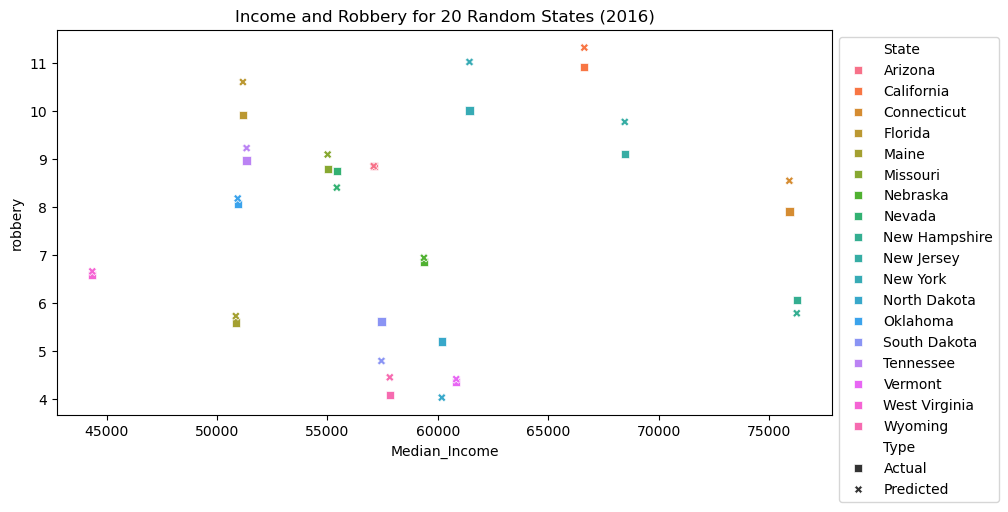

In [1286]:
markers = {"Predicted":'X', 'Actual':'s'}
g = sns.scatterplot(data = robbery_2016_preds_actual, x='Median_Income',y='robbery',\
                hue='State', style = 'Type', markers = markers)
g.figure.set_size_inches(10,5)
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
g.set(title = "Income and Robbery for 20 Random States (2016)")

# Income and Robbery for 2017

In [1287]:
robbery_2017= chosen_stats_robbery[chosen_stats_robbery['Year']==2017]
robbery_2017_actual = robbery_2017.drop(columns=['const','Binary','preds_robbery'])
robbery_2017_actual['Type'] = 'Actual'
robbery_2017_actual = robbery_2017_actual.rename(columns = {'actual_robbery':'robbery'})

robbery_2017_preds = robbery_2017.loc[:,['Year','Median_Income', 'preds_robbery','State']]
robbery_2017_preds = robbery_2017_preds.rename(columns = {'preds_robbery':'robbery'})
robbery_2017_preds['Type'] = 'Predicted'
robbery_2017_preds_actual = pd.concat([robbery_2017_actual , robbery_2017_preds], ignore_index=True, axis=0)
#print(robbery_2017_actual.head())
#robbery_2017_preds.head()

[Text(0.5, 1.0, 'Income and Robbery for 20 Random States (2017)')]

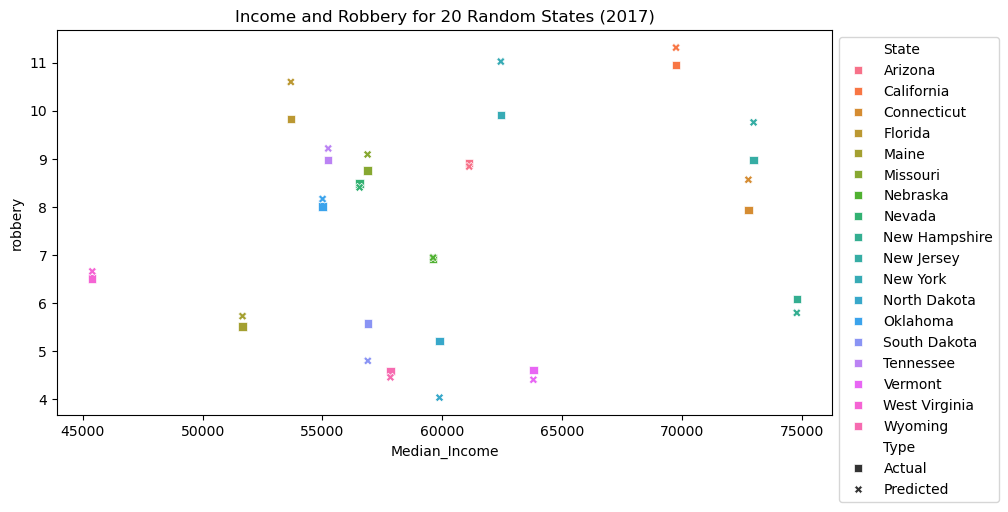

In [1288]:
markers = {"Predicted":'X', 'Actual':'s'}
g = sns.scatterplot(data = robbery_2017_preds_actual, x='Median_Income',y='robbery',\
                hue='State', style = 'Type', markers = markers)
g.figure.set_size_inches(10,5)
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
g.set(title = "Income and Robbery for 20 Random States (2017)")

# Income and Robbery for 2018

In [1289]:
robbery_2018= chosen_stats_robbery[chosen_stats_robbery['Year']==2018]
robbery_2018_actual = robbery_2018.drop(columns=['const','Binary','preds_robbery'])
robbery_2018_actual['Type'] = 'Actual'
robbery_2018_actual = robbery_2018_actual.rename(columns = {'actual_robbery':'robbery'})

robbery_2018_preds = robbery_2018.loc[:,['Year','Median_Income', 'preds_robbery','State']]
robbery_2018_preds = robbery_2018_preds.rename(columns = {'preds_robbery':'robbery'})
robbery_2018_preds['Type'] = 'Predicted'
robbery_2018_preds_actual = pd.concat([robbery_2018_actual , robbery_2018_preds], ignore_index=True, axis=0)

[Text(0.5, 1.0, 'Income and Robbery for 20 Random States (2018)')]

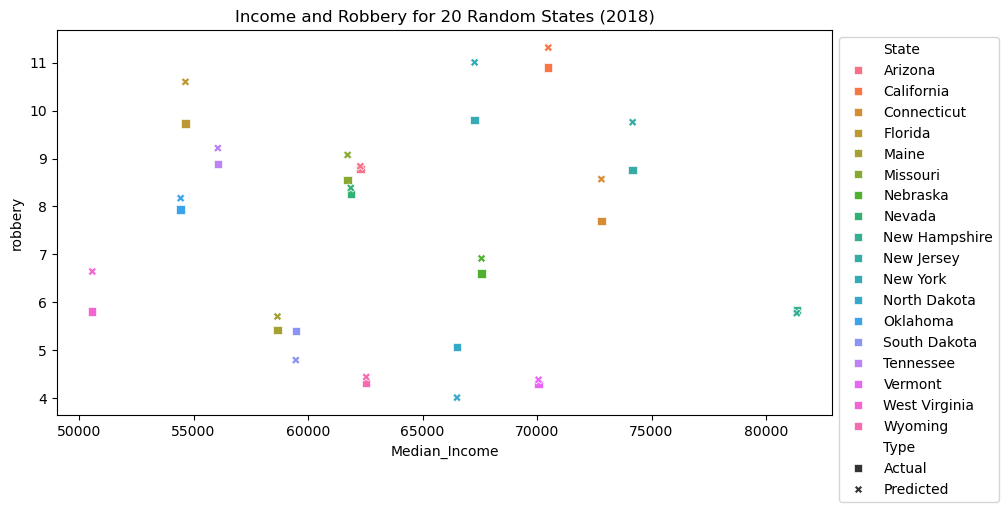

In [1290]:
markers = {"Predicted":'X', 'Actual':'s'}
g = sns.scatterplot(data = robbery_2018_preds_actual, x='Median_Income',y='robbery',\
                hue='State', style = 'Type', markers = markers)
g.figure.set_size_inches(10,5)
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
g.set(title = "Income and Robbery for 20 Random States (2018)")

### Now train model for predicting burglary given income

In [1291]:
income_burglary = duckdb.sql('''SELECT  Burglary,C.State, C.Year, Median_Income
                            FROM crime_df AS C JOIN income_melt AS I
                            ON C.State = I.State AND C.Year = I.Year
                            ORDER BY C.Year ASC''').df()
income_burglary = pd.get_dummies(income_burglary,prefix='', \
                                prefix_sep='', columns=['State'], dtype=int, drop_first=True)
income_burglary.head()

,Burglary,Year,Median_Income,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,6184,1984,32356.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,39970,1984,17310.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20810,1984,15674.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,52327,1984,21425.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,443094,1984,25287.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1292]:
X_inc_burg_train, X_inc_burg_test, y_inc_burg_train, y_inc_burg_test = \
                  train_test_split(income_burglary.iloc[:,1:],
                                   income_burglary['Burglary'], test_size=0.3, shuffle=False)
X_inc_burg_train = sm.add_constant(X_inc_burg_train)
inc_burg_model =sm.OLS(y_inc_burg_train, X_inc_burg_train).fit()
inc_burg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Burglary   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     298.0
Date:                Thu, 21 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:48:48   Log-Likelihood:                -14133.
No. Observations:                1260   AIC:                         2.837e+04
Df Residuals:                    1208   BIC:                         2.864e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.629e+06   5.61e+05      2.902      0.004    5.27e+05    2.73e+06
Year            -789.2819    284.550     -2.774      0.006   -1347.549    -231.015
Median_Income     -0.2636      0.234     -1.125      0.261      -0.723       0.196
Alaska         -3.577e+04   6490.966     -5.511      0.000   -4.85e+04    -2.3e+04
Arizona          1.37e+04   5219.803      2.625      0.009    3462.625    2.39e+04
Arkansas       -1.897e+04   5129.316     -3.699      0.000    -2.9e+04   -8910.241
California      2.842e+05   5669.352     50.122      0.000    2.73e+05    2.95e+05
Colorado       -5316.1876   5735.023     -0.927      0.354   -1.66e+04    5935.524
Connecticut    -1.421e+04   6393.675     -2.223      0.026   -2.68e+04   -1668.737
Delaware        -3.59e+04   5623.968     -6.383      0.000   -4.69e+04   -2.49e+04
Florida         1.715e+05   5138.906     33.372      0.000    1.61e+05    1.82e+05
Georgia          4.29e+04   5233.047      8.198      0.000    3.26e+04    5.32e+04
Hawaii         -2.909e+04   6106.209     -4.764      0.000   -4.11e+04   -1.71e+04
Idaho           -3.62e+04   5218.432     -6.938      0.000   -4.64e+04    -2.6e+04
Illinois        6.144e+04   5554.716     11.060      0.000    5.05e+04    7.23e+04
Indiana         3571.0747   5264.239      0.678      0.498   -6756.993    1.39e+04
Iowa           -2.346e+04   5273.936     -4.449      0.000   -3.38e+04   -1.31e+04
Kansas         -1.904e+04   5274.704     -3.610      0.000   -2.94e+04   -8694.898
Kentucky       -1.727e+04   5146.353     -3.355      0.001   -2.74e+04   -7171.741
Louisiana       7874.2984   5147.134      1.530      0.126   -2224.017     1.8e+04
Maine          -3.597e+04   5220.807     -6.890      0.000   -4.62e+04   -2.57e+04
Maryland        6199.5167   6423.657      0.965      0.335   -6403.246    1.88e+04
Massachusetts   6164.6478   5956.589      1.035      0.301   -5521.762    1.79e+04
Michigan        5.074e+04   5474.787      9.269      0.000       4e+04    6.15e+04
Minnesota      -7893.7096   5821.589     -1.356      0.175   -1.93e+04    3527.840
Mississippi    -1.629e+04   5201.537     -3.132      0.002   -2.65e+04   -6085.327
Missouri        5901.8768   5268.465      1.120      0.263   -4434.481    1.62e+04
Montana        -4.061e+04   5146.127     -7.891      0.000   -5.07e+04   -3.05e+04
Nebraska       -3.332e+04   5303.587     -6.282      0.000   -4.37e+04   -2.29e+04
Nevada         -2.373e+04   5541.198     -4.282      0.000   -3.46e+04   -1.29e+04
New Hampshire  -3.574e+04   6199.309     -5.765      0.000   -4.79e+04   -2.36e+04
New Jersey      1.996e+04   6500.023      3.070      0.002    7203.599    3.27e+04
New Mexico     -2.216e+04   5145.983     -4.306      0.000   -3.23e+04   -1.21e+04
New York        9.672e+04   5367.879     18.018      0.000    8.62e+04    1.07e+05
North Caroli

In [1293]:
X_inc_burg_test = sm.add_constant(X_inc_burg_test)
inc_burg_preds = inc_burg_model.predict(X_inc_burg_test)
print( f"MAE for predicting burglary using income: {mean_absolute_error(y_inc_burg_test, inc_burg_preds)}")
print( f"RSME for predicting burglary using income: {root_mean_squared_error(y_inc_burg_test, inc_burg_preds)}")

MAE for predicting burglary using income: 17550.1657301236
RSME for predicting burglary using income: 25884.34927546979


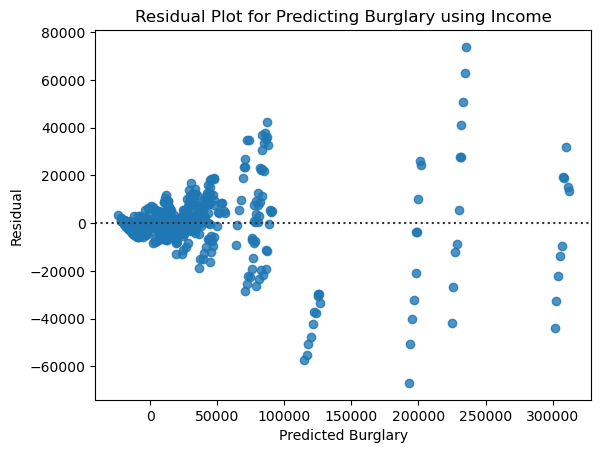

In [1294]:
inc_burg_df = pd.DataFrame({"Preds": inc_burg_preds, "Actual": y_inc_burg_test})
ax = sns.residplot(x = inc_burg_preds, y = y_inc_burg_test)
ax.set(xlabel = "Predicted Burglary", ylabel= "Residual", title = "Residual Plot for Predicting Burglary using Income");

The residual plot is extremely heteroskedastic. This shows a need for a log transformation.

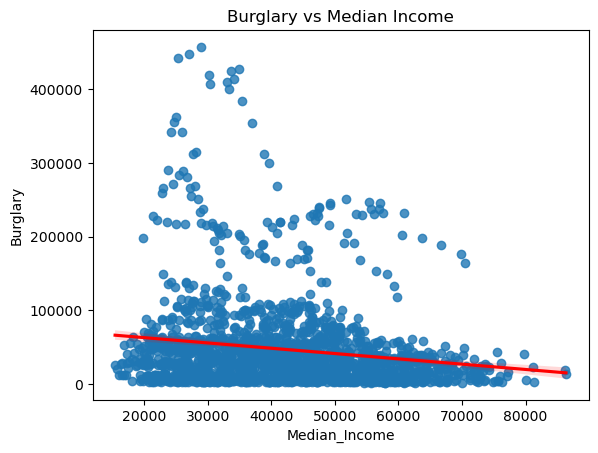

In [1295]:
sns.regplot(x = income_burglary['Median_Income'], y = income_burglary['Burglary'], line_kws = {"color":"red"});
plt.title("Burglary vs Median Income");

Based on this linear regression, we can see that there are a lot of outliers, especially vertically (y axis). Thus, it can make sense to utilize a log transform on the y (burglary) to deal with the heteroskedasticity from the residual plot and also "push" the data points in this plot closer to the actual linear regression.

MAE for predicting burglary using income: 0.1894950245621107
RSME for predicting burglary using income: 0.25217229608909597


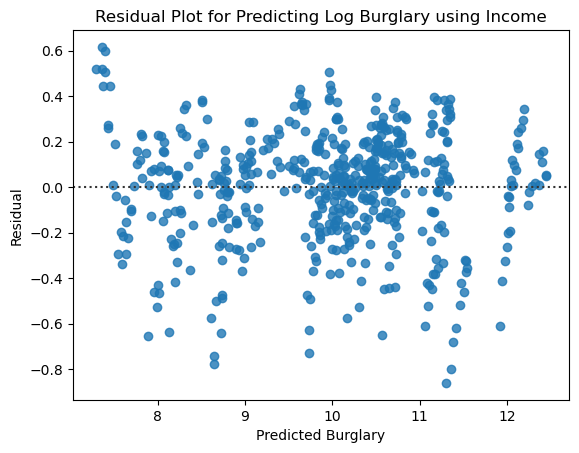

In [1296]:
income_burglary['log_burglary'] = np.log(income_burglary['Burglary'])

X_inc_burg_train, X_inc_burg_test, y_inc_burg_train, y_inc_burg_test = \
                  train_test_split(income_burglary.iloc[:,1:-1],
                                   income_burglary['log_burglary'], test_size=0.3, shuffle=False)
X_inc_burg_train = sm.add_constant(X_inc_burg_train)
inc_burg_model =sm.OLS(y_inc_burg_train, X_inc_burg_train).fit()

X_inc_burg_test = sm.add_constant(X_inc_burg_test)
inc_burg_preds = inc_burg_model.predict(X_inc_burg_test)
print( f"MAE for predicting burglary using income: {mean_absolute_error(y_inc_burg_test, inc_burg_preds)}")
print( f"RSME for predicting burglary using income: {root_mean_squared_error(y_inc_burg_test, inc_burg_preds)}")

inc_burg_df = pd.DataFrame({"Preds": inc_burg_preds, "Actual": y_inc_burg_test})
ax = sns.residplot(x = inc_burg_preds, y = y_inc_burg_test)
ax.set(xlabel = "Predicted Burglary", ylabel= "Residual", title = "Residual Plot for Predicting Log Burglary using Income");

After doing the log transformation on the y axis (burglary), we can see that our residual plot is much more random than before. It no longer exhibits the fan-shaped heteroskedascticity from earlier. Moreover, the MAE and RMSE also decreased drastically from our previous model (before the log transformation), showing that our model has also become much more accurate. 

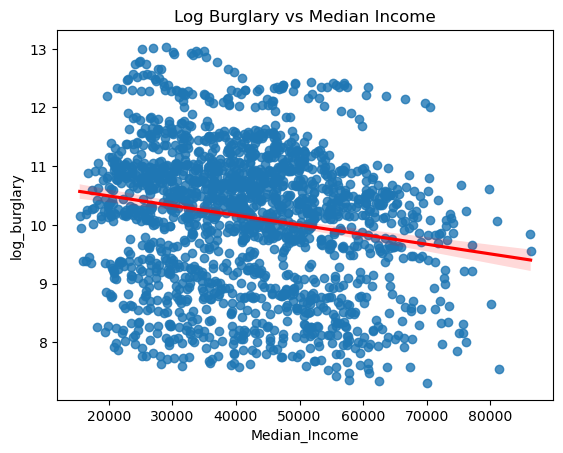

In [1297]:
sns.regplot(x = income_burglary['Median_Income'], 
            y = income_burglary['log_burglary'], 
            line_kws = {"color":"red"})
plt.title("Log Burglary vs Median Income");

# Now plot predicted vs actual when using income to predict burglary

In [1298]:
X_inc_burg_test2 = X_inc_burg_test
X_inc_burg_test2['actual_burglary'] = y_inc_burg_test
X_inc_burg_test2['preds_burglary'] = inc_burg_preds
inc_burg_melt = pd.melt(X_inc_burg_test2, id_vars=['const','Year', 'Median_Income', 'actual_burglary','preds_burglary'], \
                       var_name = 'State', value_name='Binary')
inc_burg_melt = inc_burg_melt[ inc_burg_melt['Binary']==1]
inc_burg_melt.head()

,const,Year,Median_Income,actual_burglary,preds_burglary,State,Binary
40,1.0,2010,57848.0,8.040769,8.225878,Alaska,1
90,1.0,2011,57431.0,7.955776,8.224721,Alaska,1
140,1.0,2012,63648.0,7.989560,8.155338,Alaska,1
190,1.0,2013,61137.0,7.978311,8.175717,Alaska,1
229,1.0,2013,72472.0,7.978311,8.059143,Alaska,1


In [1299]:
chosen_stats_burglary = duckdb.sql(''' SELECT * FROM inc_burg_melt
                                  WHERE Year>=2014 AND Year<=2018 AND State IN (SELECT * FROM twenty_states)''').df()
chosen_stats_burglary.head()

,const,Year,Median_Income,actual_burglary,preds_burglary,State,Binary
0,1.0,2014,49254.0,10.678491,10.712855,Arizona,1
1,1.0,2015,52248.0,10.545605,10.676618,Arizona,1
2,1.0,2016,57100.0,10.551010,10.621273,Arizona,1
3,1.0,2017,61125.0,10.537999,10.574433,Arizona,1
4,1.0,2018,62283.0,10.366813,10.557079,Arizona,1


# Income and Burglary for 2016

In [1300]:
burglary_2016= chosen_stats_burglary[chosen_stats_burglary['Year']==2016]
burglary_2016_actual = burglary_2016.drop(columns=['const','Binary','preds_burglary'])
burglary_2016_actual['Type'] = 'Actual'
burglary_2016_actual = burglary_2016_actual.rename(columns = {'actual_burglary':'burglary'})

burglary_2016_preds = burglary_2016.loc[:,['Year','Median_Income', 'preds_burglary','State']]
burglary_2016_preds = burglary_2016_preds.rename(columns = {'preds_burglary':'burglary'})
burglary_2016_preds['Type'] = 'Predicted'
burglary_2016_preds_actual = pd.concat([burglary_2016_actual , burglary_2016_preds], ignore_index=True, axis=0)
#burglary_2016_preds_actual

[Text(0.5, 1.0, 'Income and Burglary for 20 Random States (2016)')]

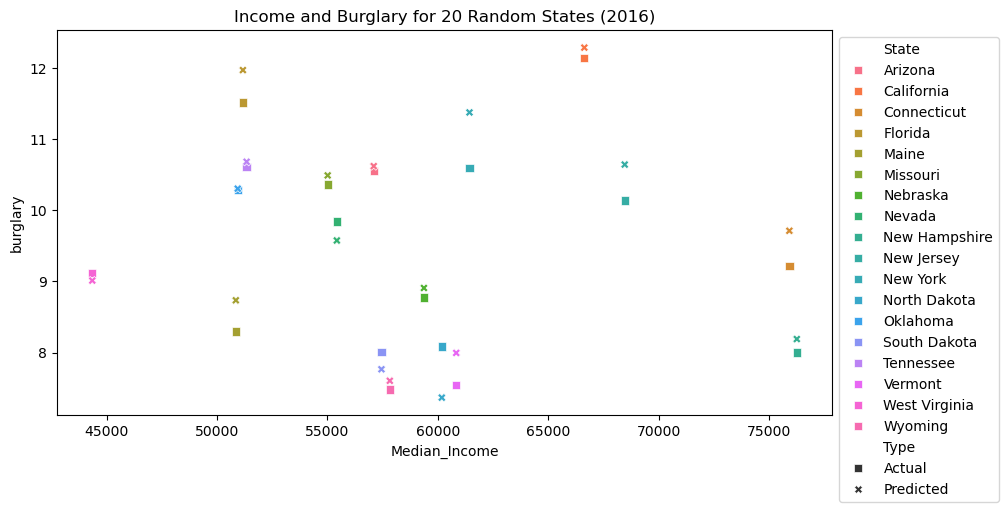

In [1301]:
g = sns.scatterplot(data = burglary_2016_preds_actual, x='Median_Income',y='burglary',\
                hue='State', style = 'Type', markers = markers)
g.figure.set_size_inches(10,5)
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
g.set(title = "Income and Burglary for 20 Random States (2016)")

# Income and Burglary for 2017

In [1302]:
burglary_2017= chosen_stats_burglary[chosen_stats_burglary['Year']==2017]
burglary_2017_actual = burglary_2017.drop(columns=['const','Binary','preds_burglary'])
burglary_2017_actual['Type'] = 'Actual'
burglary_2017_actual = burglary_2017_actual.rename(columns = {'actual_burglary':'burglary'})

burglary_2017_preds = burglary_2017.loc[:,['Year','Median_Income', 'preds_burglary','State']]
burglary_2017_preds = burglary_2017_preds.rename(columns = {'preds_burglary':'burglary'})
burglary_2017_preds['Type'] = 'Predicted'
burglary_2017_preds_actual = pd.concat([burglary_2017_actual , burglary_2017_preds], ignore_index=True, axis=0)
#burglary_2017_preds_actual

[Text(0.5, 1.0, 'Income and Burglary for 20 Random States (2017)')]

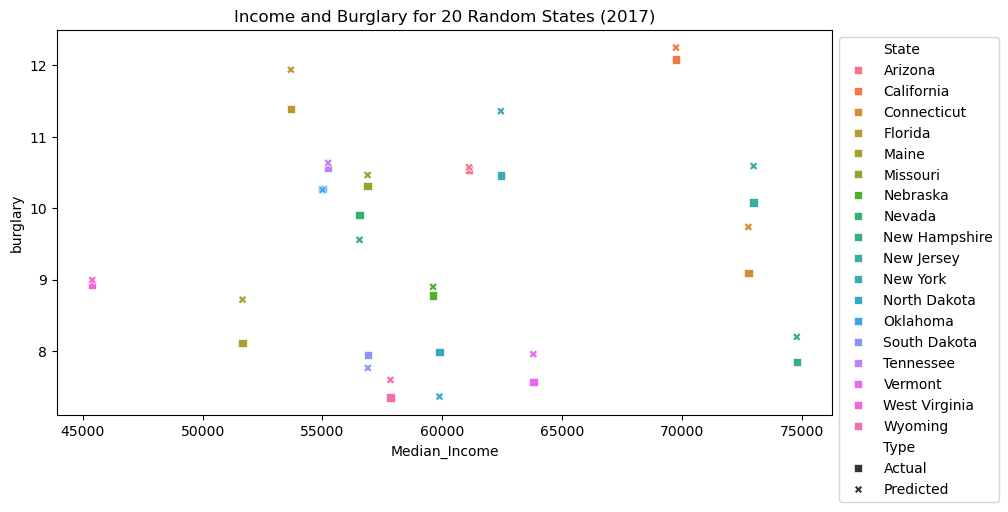

In [1303]:
g = sns.scatterplot(data = burglary_2017_preds_actual, x='Median_Income',y='burglary',\
                hue='State', style = 'Type', markers = markers)
g.figure.set_size_inches(10,5)
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
g.set(title = "Income and Burglary for 20 Random States (2017)")

# Income and Burglary for 2018

In [1304]:
burglary_2018= chosen_stats_burglary[chosen_stats_burglary['Year']==2018]
burglary_2018_actual = burglary_2018.drop(columns=['const','Binary','preds_burglary'])
burglary_2018_actual['Type'] = 'Actual'
burglary_2018_actual = burglary_2018_actual.rename(columns = {'actual_burglary':'burglary'})

burglary_2018_preds = burglary_2018.loc[:,['Year','Median_Income', 'preds_burglary','State']]
burglary_2018_preds = burglary_2018_preds.rename(columns = {'preds_burglary':'burglary'})
burglary_2018_preds['Type'] = 'Predicted'
burglary_2018_preds_actual = pd.concat([burglary_2018_actual , burglary_2018_preds], ignore_index=True, axis=0)
#burglary_2018_preds_actual

[Text(0.5, 1.0, 'Income and Burglary for 20 Random States (2018)')]

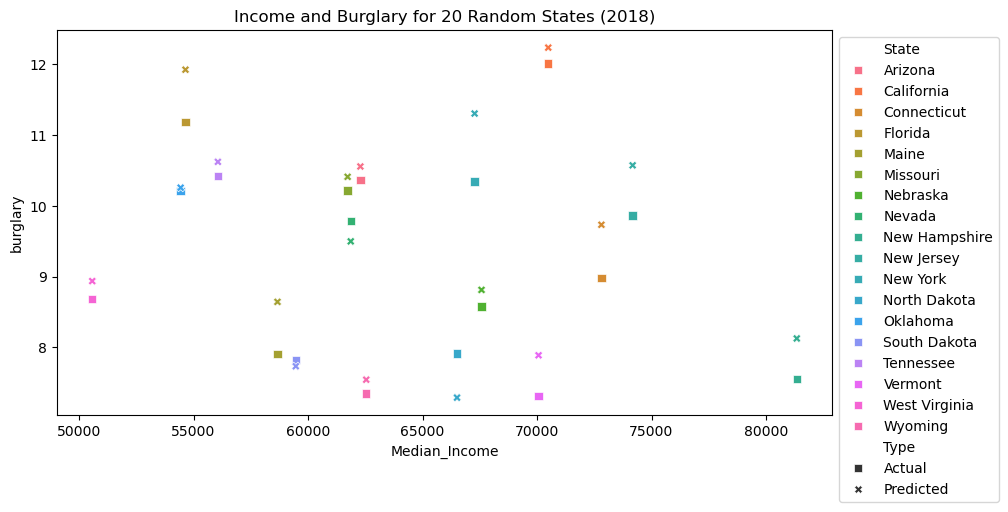

In [1305]:
g = sns.scatterplot(data = burglary_2018_preds_actual, x='Median_Income',y='burglary',\
                hue='State', style = 'Type', markers = markers)
g.figure.set_size_inches(10,5)
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
g.set(title = "Income and Burglary for 20 Random States (2018)")

# Hypothesis 2

### States that are above the U.S unemployment average over the years 1980 to 2018 are more accurate in predicting violent crime than those below the national average.

In [1306]:
#avg unemployment in the US
us_avg = job_df.iloc[0, 1:]
#print(us_avg)
us_average = us_avg.sum()/us_avg.size
print(us_average)

6.264102564102564


Looking across all the years from 1980 to 2018, the U.S. unemployment rate average is about 6.264.

In [1307]:
#created a dictionary with all states and their respective unemployment averages across the years 1980 to 2018
dict_avg = {}
states = job_df.iloc[1:, 0].reset_index(drop=True) #rows 0,1,...50
#print(states)

#for x in range(1, 38):
for x in range(0,states.size):
    the_avg = job_df.iloc[x+1, 1:] #get the row for this state
    dict_avg[states[x]] = the_avg.sum()/(2018-1980) + 1

print(dict_avg)


{'Alabama': 8.339473684210525, 'Alaska': 8.976315789473684, 'Arizona': 7.371052631578947, 'Arkansas': 7.628947368421051, 'California': 8.39736842105263, 'Colorado': 6.46578947368421, 'Connecticut': 6.518421052631578, 'Delaware': 6.278947368421052, 'District of Columbia': 8.736842105263161, 'Florida': 7.197368421052631, 'Georgia': 7.1236842105263145, 'Hawaii': 5.7026315789473685, 'Idaho': 7.094736842105262, 'Illinois': 8.157894736842106, 'Indiana': 7.342105263157896, 'Iowa': 5.755263157894736, 'Kansas': 5.88157894736842, 'Kentucky': 8.06578947368421, 'Louisiana': 8.507894736842106, 'Maine': 6.776315789473684, 'Maryland': 6.360526315789474, 'Massachusetts': 6.457894736842107, 'Michigan': 9.092105263157896, 'Minnesota': 5.978947368421053, 'Mississippi': 8.807894736842107, 'Missouri': 7.123684210526315, 'Montana': 6.8921052631578945, 'Nebraska': 4.6421052631578945, 'Nevada': 7.75, 'New Hampshire': 5.3578947368421055, 'New Jersey': 7.221052631578949, 'New Mexico': 7.849999999999999, 'New Yo

In [1308]:
states_unemp_avg_df = pd.DataFrame({'State':np.asarray(states), 'Avg_Unemployment':dict_avg.values()})
avg_violent_crime_states = duckdb.sql('''SELECT SUM(Violent_Crime)/Count(*) AS AvgViolentCrime, State
                                      FROM crime_df AS C
                                      GROUP BY State''').df()
states_unemp_avg_df = duckdb.sql(''' SELECT A.*, Avg_Unemployment
                                 FROM avg_violent_crime_states  AS A JOIN states_unemp_avg_df AS S
                                  ON A.State  = S.State''').df()
states_unemp_avg_df.head()

,AvgViolentCrime,State,Avg_Unemployment
0,26380.255814,Arizona,7.371053
1,7954.674419,Iowa,5.755263
2,10646.139535,Kansas,5.881579
3,31070.186047,Louisiana,8.507895
4,42952.465116,Ohio,7.902632


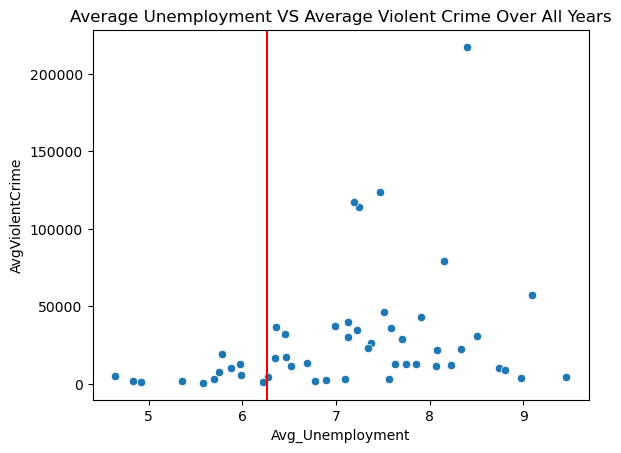

In [1309]:
g= sns.scatterplot(data = states_unemp_avg_df, x ='Avg_Unemployment', y='AvgViolentCrime');
plt.axvline(x = us_average, color = "red");
plt.title('Average Unemployment VS Average Violent Crime Over All Years');

This scatterplot is a data visualization that demonstrates the national average unemployment rate as a vertical line. Then, it also represents the 50 states that are scattered across, showing that there are significantly more states that have unemployment rates greater than the national average, comparatively to the number of states below the national average.

Particularly, we plotted this average unemployment rate against the average violent crime (y axis). The general trend that this plot exemplifies is that a greater average unemployment rate corresponds to a greater average violent crime rate. We seek to investigate this through a comparison of two different models, one for states that are below the national unemployment rate average and one for states that are above the national unemployment rate average.

However, first, we want to explore if overall, on average, there is a significant relationship between average unemployment across the years and average violent crime rates over the years.

In [1310]:
# generally using OLS regressions to test for significance of relationship between average unemployment rate and average violent crime rates

x_val = states_unemp_avg_df['Avg_Unemployment']
x_val = sm.add_constant(x_val)
y_val = states_unemp_avg_df['AvgViolentCrime']

model = sm.OLS(y_val, x_val)
fitted = model.fit()

print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:        AvgViolentCrime   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     4.644
Date:                Thu, 21 Nov 2024   Prob (F-statistic):             0.0361
Time:                        17:48:50   Log-Likelihood:                -609.32
No. Observations:                  51   AIC:                             1223.
Df Residuals:                      49   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.353e+04   3.37e+04  

Based on this OLS regression, we can observe that the p value for average unemployment rate is less than our signifiance level of 0.05. This is important since it shows that our coefficient is signifiant. Particularly, it has a very coefficient of 1.01e+04, showing that for every increase in one unit of average unemployment rate, there is a corresponding increase in 1.01e+04 unit of violent crime rates.

In [1311]:
# put all states that are lower than the national average in one list
# put all states that are above the national average in another list

less_dict = []
more_dict = []
count = 2
dict_avg[states[count]]

for x in dict_avg:
    rate = dict_avg[x]
    if rate < us_average:
        less_dict.append(x)
    else:
        more_dict.append(x)

print(less_dict)
print(more_dict)


['Hawaii', 'Iowa', 'Kansas', 'Minnesota', 'Nebraska', 'New Hampshire', 'North Dakota', 'South Dakota', 'Utah', 'Vermont', 'Virginia', 'Wyoming']
['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Idaho', 'Illinois', 'Indiana', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Mississippi', 'Missouri', 'Montana', 'Nevada', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'Tennessee', 'Texas', 'Washington', 'West Virginia', 'Wisconsin']


In [1312]:
#now get the info for states that have above average
states_above_df = job_melt[ job_melt['Area'].isin(more_dict)]
states_above_df.head()

,Area,Year,UnemploymentRate
1,Alabama,1980,8.9
2,Alaska,1980,9.6
3,Arizona,1980,6.6
4,Arkansas,1980,7.6
5,California,1980,6.8


In [1313]:
states_above_df = duckdb.sql('''Select  C.Violent_Crime, S.*
                             FROM states_above_df AS S JOIN crime_df AS C
                             ON  S.Year = C.Year AND S.Area = C.State''').df()
states_above_df.head()

,Violent_Crime,Area,Year,UnemploymentRate
0,1919,Alaska,1980,9.6
1,17320,Alabama,1980,8.9
2,7656,Arkansas,1980,7.6
3,210290,California,1980,6.8
4,15215,Colorado,1980,5.8


In [1314]:
states_above_df = pd.get_dummies(states_above_df, prefix='', prefix_sep='',\
                                  drop_first=True, dtype=int, columns=['Area'])
states_above_df['Year'] = states_above_df['Year'].astype(int)
states_above_df.head()

,Violent_Crime,Year,UnemploymentRate,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,Tennessee,Texas,Washington,West Virginia,Wisconsin
0,1919,1980,9.6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,17320,1980,8.9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7656,1980,7.6,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,210290,1980,6.8,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,15215,1980,5.8,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Train the model for years 1980-2018; unemployment rate and violent crime rate for states above average

In [1315]:
X_train_above, X_test_above, Y_train_above, Y_test_above = \
  train_test_split(states_above_df.iloc[:, 1:],states_above_df['Violent_Crime'],\
                    test_size=.30, shuffle=False)
X_train_above = sm.add_constant(X_train_above)
model_above = sm.OLS( Y_train_above,X_train_above).fit()

In [1316]:
X_test_above = sm.add_constant(X_test_above)
preds_above = model_above.predict(X_test_above)
y_above_df = pd.DataFrame(data = {"Preds":preds_above, "Actual":Y_test_above})
y_above_df.head()

,Preds,Actual
1064,7026.161604,7866
1065,-281.314908,5048
1066,123445.548808,94087
1067,-693.544532,3348
1068,83410.052612,53556


In [1317]:
print( f"MAE for predicting violent crime rate using states above national average: {mean_absolute_error(preds_above,Y_test_above)}")
print( f"RSME for predicting violent crime rate using states above national average: {root_mean_squared_error(preds_above,Y_test_above)}")

MAE for predicting violent crime rate using states above national average: 7915.812378514861
RSME for predicting violent crime rate using states above national average: 15479.315695712612


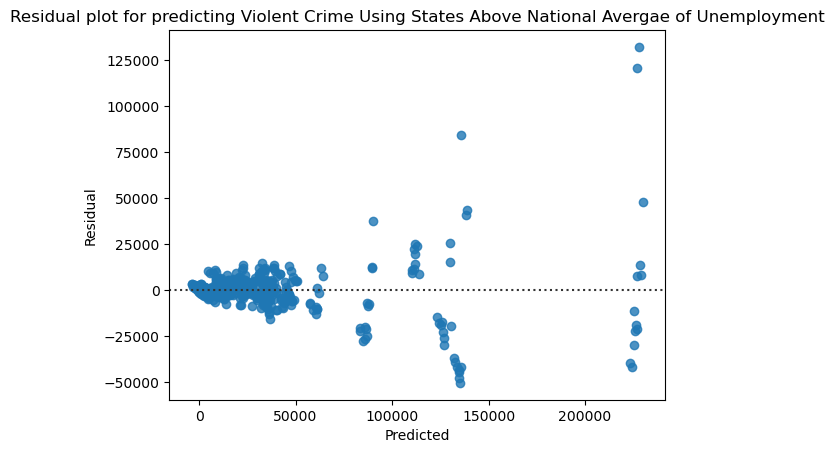

In [1318]:
ax = sns.residplot(data= y_above_df, x = 'Preds', y = 'Actual')
ax.set(xlabel = "Predicted", ylabel= "Residual", title="Residual plot for predicting Violent Crime Using States Above National Avergae of Unemployment");

This residual plot is extremely heteroskedastic, fan shaped, which shows a need for a log transformation.

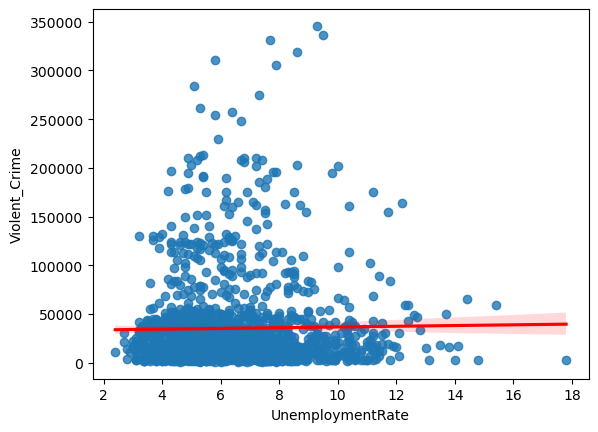

In [1319]:
sns.regplot(x = states_above_df['UnemploymentRate'], y = states_above_df['Violent_Crime'], line_kws = {"color":"red"});

Looking at this linear regression plot, we can see a lot of outlier values. More specifically, there are many values that are signficantly above the overall trend of the linear regression line, signifying that we should consider a log transform on the y axis (violent crime rate). Moreover, since there are also seems to be some outliers towards the right of the plot (as most of the data is clustered towards lower x values), we also plan on doing a log transform on the x axis (unemployment rate).

MAE for predicting violent crime rate using states above national average: 0.21924054627991002
RSME for predicting violent crime rate using states above national average: 0.27352759131431054


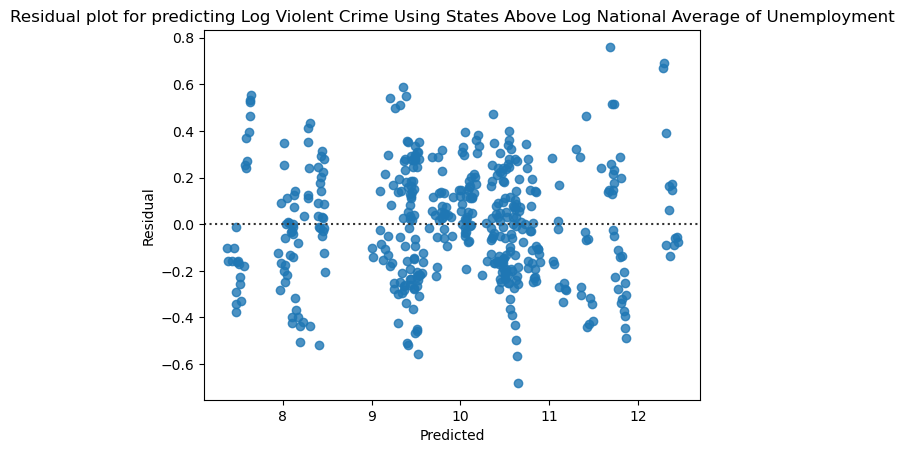

In [1320]:
states_above_df['log_unemployment'] = np.log(states_above_df['UnemploymentRate'])
states_above_df['log_crime'] = np.log(states_above_df['Violent_Crime'])
modifed_df = states_above_df.drop(columns = "UnemploymentRate")

#print(modifed_df.columns)
X_train_above, X_test_above, Y_train_above, Y_test_above = \
  train_test_split(states_above_df.iloc[:, 1:-1],modifed_df['log_crime'],\
                    test_size=.30, shuffle=False)
X_train_above = sm.add_constant(X_train_above)
model_above = sm.OLS( Y_train_above,X_train_above).fit()

X_test_above = sm.add_constant(X_test_above)
preds_above = model_above.predict(X_test_above)
y_above_df = pd.DataFrame(data = {"Preds":preds_above, "Actual":Y_test_above})

y_above_df.head()

ax = sns.residplot(data= y_above_df, x = 'Preds', y = 'Actual')
ax.set(xlabel = "Predicted", ylabel= "Residual", 
       title="Residual plot for predicting Log Violent Crime Using States Above Log National Average of Unemployment");

print( f"MAE for predicting violent crime rate using states above national average: {mean_absolute_error(preds_above,Y_test_above)}")
print( f"RSME for predicting violent crime rate using states above national average: {root_mean_squared_error(preds_above,Y_test_above)}")

After doing the log transform on both the x and y axes, we have a more random residual plot, which is significantly better than the heteroskedastic plot from earlier. Moreover, after doing these log transforms, we also learned that our MAE and RMSE for predicting violent crime rate using states above the national average are signficantly lower than the previous model. This demonstrates that our log transformations have also made our model more accurate and indicative of what it is trying to measure.

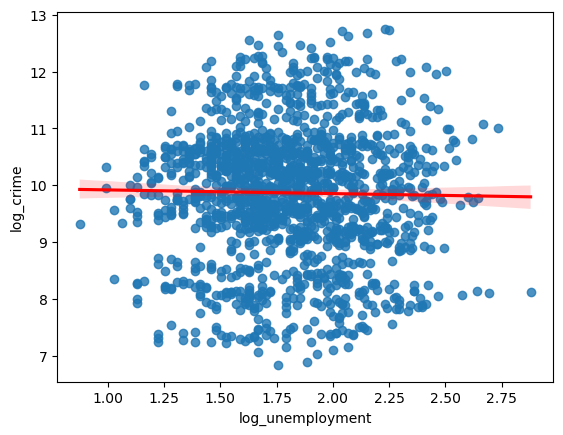

In [1321]:
sns.regplot(x = states_above_df['log_unemployment'], y = states_above_df['log_crime'], line_kws = {"color":"red"});

In [1322]:
print(model_above.summary())

                            OLS Regression Results                            
Dep. Variable:              log_crime   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     807.5
Date:                Thu, 21 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:48:51   Log-Likelihood:                 185.68
No. Observations:                1064   AIC:                            -287.4
Df Residuals:                    1022   BIC:                            -78.63
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.8772 

Looking at this OLS regression, we observe that the p value for unemployment rate (what we are interested in) is significant (based on a 0.05 significance level). From this, we can see that the coefficient of -0.0489, demonstrates that there is a negative relationship between unemployment rate and violent crime rates.

# Now train model for years 1980-2018; states with unemployment rate below average, violent crime rate

In [1323]:
states_below_df = job_melt[ job_melt['Area'].isin(less_dict)]
states_below_df.head()

,Area,Year,UnemploymentRate
12,Hawaii,1980,5.0
16,Iowa,1980,6.0
17,Kansas,1980,4.4
24,Minnesota,1980,5.8
28,Nebraska,1980,3.9


In [1324]:
states_below_df = duckdb.sql('''Select  C.Violent_Crime, S.*
                             FROM states_below_df AS S JOIN crime_df AS C
                             ON  S.Year = C.Year AND S.Area = C.State''').df()
states_below_df.head()

,Violent_Crime,Area,Year,UnemploymentRate
0,9168,Kansas,1980,4.4
1,352,North Dakota,1980,4.9
2,3512,Nebraska,1980,3.9
3,4425,Utah,1980,6.2
4,16355,Virginia,1980,5.2


In [1325]:
states_below_df = pd.get_dummies(states_below_df, prefix='', prefix_sep='',\
                                  drop_first=True, dtype=int, columns=['Area'])
states_below_df['Year'] = states_below_df['Year'].astype(int)
states_below_df.head()

,Violent_Crime,Year,UnemploymentRate,Iowa,Kansas,Minnesota,Nebraska,New Hampshire,North Dakota,South Dakota,Utah,Vermont,Virginia,Wyoming
0,9168,1980,4.4,0,1,0,0,0,0,0,0,0,0,0
1,352,1980,4.9,0,0,0,0,0,1,0,0,0,0,0
2,3512,1980,3.9,0,0,0,1,0,0,0,0,0,0,0
3,4425,1980,6.2,0,0,0,0,0,0,0,1,0,0,0
4,16355,1980,5.2,0,0,0,0,0,0,0,0,0,1,0


In [1326]:
X_train_below, X_test_below, Y_train_below, Y_test_below = \
  train_test_split(states_below_df.iloc[:,1:],
                   states_below_df['Violent_Crime'], test_size=.30, shuffle=False)
#print(Y_test)
X_train_below = sm.add_constant(X_train_below)
model_below = sm.OLS( Y_train_below,X_train_below).fit()

In [1327]:
X_test_below = sm.add_constant(X_test_below)
preds_below = model_below.predict(X_test_below)
y_below_df = pd.DataFrame(data = {"Preds":preds_below, "Actual":Y_test_below})
y_below_df.head()

,Preds,Actual
327,1446.261847,775
328,2184.911415,1212
329,3798.416198,3362
330,8725.378708,8484
331,11175.272298,10235


In [1328]:
print( f"MAE for predicting violent crime rate using states below national average: {mean_absolute_error(preds_below,Y_test_below)}")
print( f"RSME for predicting violent crime rate using states below national average: {root_mean_squared_error(preds_below,Y_test_below)}")

MAE for predicting violent crime rate using states below national average: 877.0012541509345
RSME for predicting violent crime rate using states below national average: 1236.8501710792561


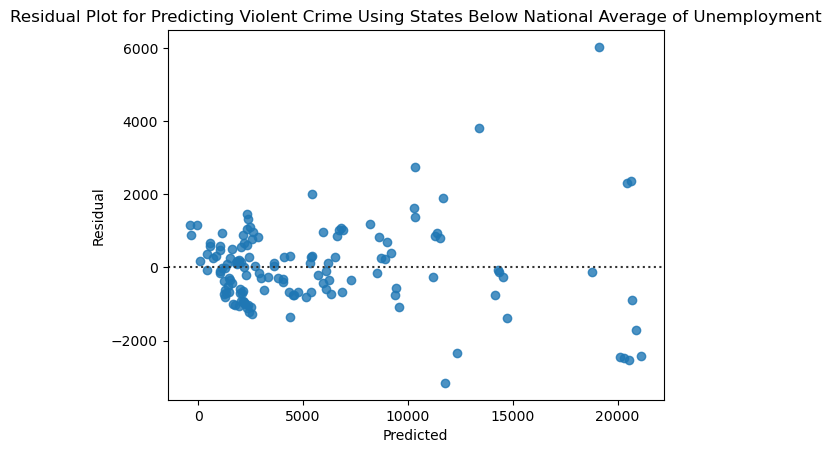

In [1329]:
ax = sns.residplot(data= y_below_df, x = 'Preds', y = 'Actual')
ax.set(xlabel = "Predicted", ylabel= "Residual", title="Residual Plot for Predicting Violent Crime Using States Below National Average of Unemployment");

Clearly, this residual plot is very hetereoskedastic, calling for a log transformation.

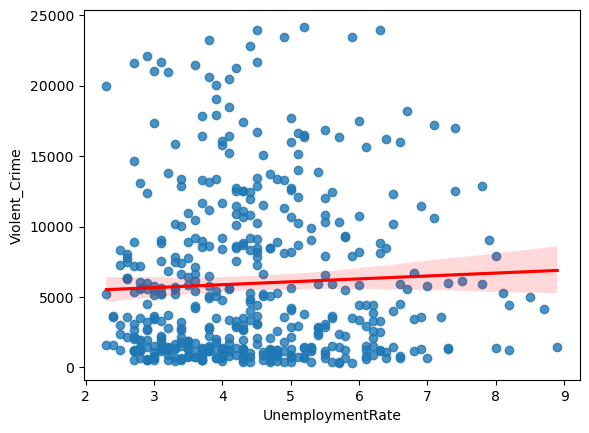

In [1330]:
sns.regplot(x = states_below_df['UnemploymentRate'], y = states_below_df['Violent_Crime'], line_kws = {"color":"red"});

Moreover, looking at this linear regression plot, we can observe that there needs to be a log transformation on the y axis (violent crime rates). This is because if we look at the axes, the y axis is increasing at a much greater rate than the x axis is increasing. Moreover, in the plot itself, we can observe that there are many data points that are outliers in terms of y axis, comparative to our linear regression line. 

MAE for predicting violent crime rate using states below national average: 0.22514088308826197
RSME for predicting violent crime rate using states below national average: 0.29602961420061813


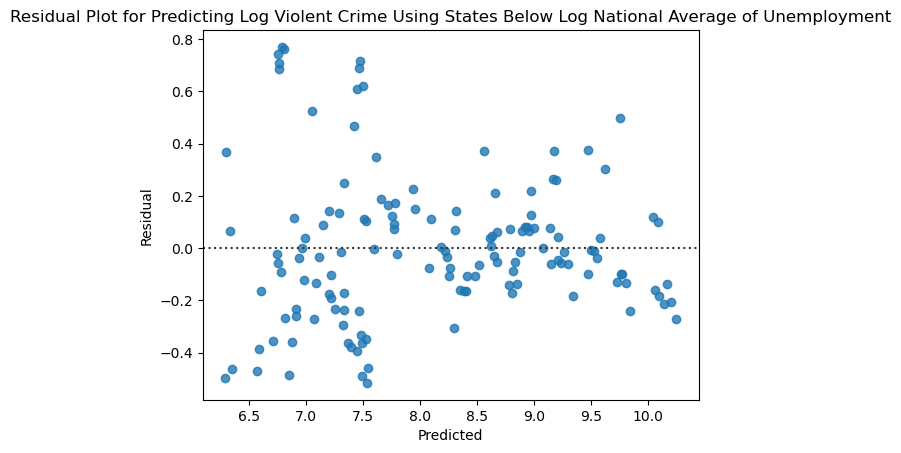

In [1331]:
states_below_df['log_crime'] = np.log(states_below_df['Violent_Crime'])

X_train_below, X_test_below, Y_train_below, Y_test_below = \
  train_test_split(states_below_df.iloc[:,1:-1],
                   states_below_df['log_crime'], test_size=.30, shuffle=False)
#print(Y_test)
X_train_below = sm.add_constant(X_train_below)
model_below = sm.OLS( Y_train_below,X_train_below).fit()

X_test_below = sm.add_constant(X_test_below)
preds_below = model_below.predict(X_test_below)
y_below_df = pd.DataFrame(data = {"Preds":preds_below, "Actual":Y_test_below})
y_below_df.head()

print( f"MAE for predicting violent crime rate using states below national average: {mean_absolute_error(preds_below,Y_test_below)}")
print( f"RSME for predicting violent crime rate using states below national average: {root_mean_squared_error(preds_below,Y_test_below)}")

ax = sns.residplot(data= y_below_df, x = 'Preds', y = 'Actual')
ax.set(xlabel = "Predicted", ylabel= "Residual", 
       title="Residual Plot for Predicting Log Violent Crime Using States Below Log National Average of Unemployment");


After doing the log transformation on the y axis, we can observe that this residual plot is much more random. It is no longer exemplifying the heteroskedastic, fan shape from the previous residual plot. Moreover, we can also see that the MAE and RMSE have decreased substantially from our previous model (without the log transformation), which demonstrates that this model is much more accurate and reliable.

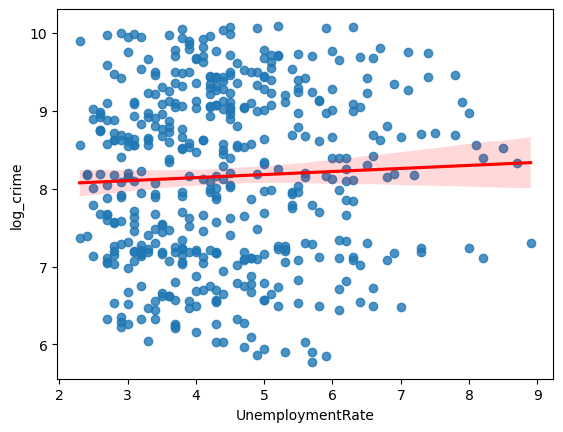

In [1332]:
sns.regplot(x = states_below_df['UnemploymentRate'], y = states_below_df['log_crime'], line_kws = {"color":"red"});

In [1333]:
print(model_below.summary())

                            OLS Regression Results                            
Dep. Variable:              log_crime   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     781.0
Date:                Thu, 21 Nov 2024   Prob (F-statistic):          1.10e-229
Time:                        17:48:51   Log-Likelihood:                 63.834
No. Observations:                 327   AIC:                            -99.67
Df Residuals:                     313   BIC:                            -46.61
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -18.2185      2.408  

Looking at this OLS regression, we observe that the p value for unemployment rate is significant (based on a 0.05 significance level). Moreover, we observe that the p value for the year is insignificant since it is greater than the 0.05 signficance level. This shows that the significant coefficient for unemployment rate, which is -0.0450, shows that there is a negative relationship between unemployment rate and violent crime rates.

## Conclusion

In conclusion, when looking at the average unemployment rate over the years vs average violent crime rates over the years, we got a significant coefficient, showing a positive relationship between the two. From there, to actually test our specific hypothesis, we looked at two groups: states that have an unemployment rate that is lower than the national average and states that have an unemployment rate that is greater than the national average. With this information, we created two models that can predict the violent crime rates based on the category of unemployment rate the states fall into (either below or above the national average).

After log transformations, we observed the following about our predictive models:
#### States Below National Average:
- RMSE: 0.29602961420061813
- MAE: 0.22514088308826197

#### States Above National Average:

- RSME: 0.27352759131431054
- MAE: 0.21924054627991002

With the relatively low and similar RMSE and MAE values across the states that are above and below the national average, we can conclude that both of our models are accurate.

Moreover, with OLS regression models for both of the two groups, we also performed signficance testing showing that for states that are below the national average, the coefficient for unemployment rate was significant, and for states that are above the national average, the coefficient for unemployment rate was also signfiacnt. They both showed a negative relationship between unemployment rates and violent crime rates.

# Hypothesis 3
### Income, population, unemployment and poverty can best determine the sub-category of homicide within the 4 categories of violent crime for each state regardless of year


In [1334]:
crime_job = duckdb.sql('''SELECT C.State, C.Year, UnemploymentRate,
                               C.Population,
                               FROM crime_df AS C
                               JOIN job_melt AS J ON
                               C.Year = J.Year AND J.Area = C.State
                               ''').df()
cj_poverty = duckdb.sql('''SELECT C.State, C.Year, C.Population, UnemploymentRate, PovertyPercent
                               FROM crime_job AS C
                               JOIN poverty_concat AS P ON
                               C.Year = P.Year AND C.State = P.State
                               ''').df()
four_factors= duckdb.sql('''SELECT C.State, C.Year, C.Population, UnemploymentRate, PovertyPercent,
                        Median_Income
                               FROM cj_poverty AS C
                               JOIN income_melt AS I ON
                               C.Year = I.Year AND C.State = I.State
                               ORDER BY C.Year ASC''').df()
four_factors.head() #2013 - 2018

,State,Year,Population,UnemploymentRate,PovertyPercent,Median_Income
0,Alabama,2013,4833996,7.2,16.7,47320.0
1,Alaska,2013,737259,7.0,10.9,72472.0
2,Arizona,2013,6634997,7.7,20.2,52611.0
3,Arkansas,2013,2958765,7.2,17.1,39376.0
4,California,2013,38431393,8.9,14.9,60794.0


# MODEL FOR RAPE

In [1335]:
rape_fourfactors= duckdb.sql('''SELECT C.Rape, F.*
                               FROM crime_df AS C
                               JOIN four_factors AS F ON
                               C.Year = F.Year AND C.State = F.State
                               ORDER BY C.Year ASC''').df()
rape_fourfactors = pd.get_dummies(rape_fourfactors, prefix='', prefix_sep='',\
                                  drop_first=True, dtype=int, columns=['State'])
#print(rape_fourfactors)
X4_train_rape, X4_test_rape, Y4_train_rape, Y4_test_rape = \
  train_test_split(rape_fourfactors.iloc[:,1:], rape_fourfactors['Rape'],\
                   test_size=.30, shuffle=False)
X4_train_rape = sm.add_constant(X4_train_rape)
model_rape = sm.OLS(Y4_train_rape,X4_train_rape).fit()
model_rape.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rape   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     372.1
Date:                Thu, 21 Nov 2024   Prob (F-statistic):          3.06e-167
Time:                        17:48:51   Log-Likelihood:                -1693.3
No. Observations:                 245   AIC:                             3497.
Df Residuals:                     190   BIC:                             3689.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.335e+04    6.7e+04      0.647      0.519   -8.89e+04    1.76e+05
Year               -25.2902     33.294     -0.760      0.448     -90.964      40.384
Population           0.0019      0.000     11.033      0.000       0.002       0.002
UnemploymentRate   -66.5489     37.403     -1.779      0.077    -140.328       7.231
PovertyPercent      13.4160     17.912      0.749      0.455     -21.916      48.748
Median_Income        0.0143      0.008      1.785      0.076      -0.002       0.030
Alaska            6405.1410    767.548      8.345      0.000    4891.131    7919.151
Arizona          -2599.2507    387.206     -6.713      0.000   -3363.026   -1835.475
Arkansas          3296.8095    378.494      8.710      0.000    2550.220    4043.399
California       -5.512e+04   5861.979     -9.403      0.000   -6.67e+04   -4.36e+04
Colorado          -183.7796    263.086     -0.699      0.486    -702.724     335.165
Connecticut        871.7753    359.199      2.427      0.016     163.245    1580.306
Delaware          5597.2542    718.121      7.794      0.000    4180.740    7013.768
Florida          -2.382e+04   2616.636     -9.103      0.000    -2.9e+04   -1.87e+04
Georgia          -9033.2682    929.201     -9.722      0.000   -1.09e+04   -7200.393
Hawaii            4612.3950    665.988      6.926      0.000    3298.715    5926.075
Idaho             4575.6542    604.977      7.563      0.000    3382.321    5768.988
Illinois         -1.243e+04   1397.072     -8.894      0.000   -1.52e+04   -9670.028
Indiana          -3161.3509    353.543     -8.942      0.000   -3858.725   -2463.977
Iowa              2155.4384    397.188      5.427      0.000    1371.975    2938.902
Kansas            2926.0533    408.584      7.161      0.000    2120.111    3731.996
Kentucky           389.3660    213.415      1.824      0.070     -31.600     810.332
Louisiana          -34.0387    196.832     -0.173      0.863    -422.296     354.219
Maine             4980.6499    651.382      7.646      0.000    3695.780    6265.520
Maryland         -2846.1972    332.964     -8.548      0.000   -3502.977   -2189.417
Massachusetts    -3792.8940    401.228     -9.453      0.000   -4584.327   -3001.461
Michigan         -4983.1334    892.946     -5.581      0.000   -6744.495   -3221.772
Minnesota        -1455.4546    274.739     -5.298      0.000   -1997.384    -913.525
Mississippi       2670.6673    373.461      7.151      0.000    1934.005    3407.329
Missouri         -2065.9710    285.154     -7.245      0.000   -2628.445   -1503.497
Montana           5612.9533    704.762      7.964      0.000    4222.790    7003.116
Nebraska          4177.3261    586.833      7.118      0.000    3019.782    5334.870
Nevada            3314.9961    397.850      8.332      0.000    2530.226    4099.766
New Hampshire     4874.

In [1336]:
#make predictions using rape model
X4_test_rape = sm.add_constant(X4_test_rape)
rape4_preds = model_rape.predict(X4_test_rape)
print( f"MAE for predicting rape using the four factors: {mean_absolute_error(Y4_test_rape, rape4_preds)}")
print( f"RSME for predicting rape using the four factors: {root_mean_squared_error(Y4_test_rape, rape4_preds)}")

MAE for predicting rape using the four factors: 311.51113832282806
RSME for predicting rape using the four factors: 513.7375185739035


## MODEL FOR HOMICIDE

In [1337]:
homicide_fourfactors= duckdb.sql('''SELECT C.Homicide, F.*
                               FROM crime_df AS C
                               JOIN four_factors AS F ON
                               C.Year = F.Year AND C.State = F.State
                               ORDER BY C.Year ASC''').df()
homicide_fourfactors = pd.get_dummies(homicide_fourfactors, prefix='', prefix_sep='',\
                                  drop_first=True, dtype=int, columns=['State'])
#print(homicide_fourfactors)

X4_train_homi, X4_test_homi, Y4_train_homi, Y4_test_homi = \
  train_test_split(homicide_fourfactors.iloc[:,1:], homicide_fourfactors['Homicide'],\
                   test_size=.30, shuffle=False)
X4_train_homi = sm.add_constant(X4_train_homi)
model_homicide = sm.OLS(Y4_train_homi,X4_train_homi).fit()
model_homicide.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Homicide   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     402.7
Date:                Thu, 21 Nov 2024   Prob (F-statistic):          1.84e-170
Time:                        17:48:51   Log-Likelihood:                -1201.4
No. Observations:                 245   AIC:                             2513.
Df Residuals:                     190   BIC:                             2705.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2.392e+04   8998.286     -2.658      0.009   -4.17e+04   -6166.430
Year                11.6447      4.470      2.605      0.010       2.827      20.462
Population           0.0002   2.32e-05      7.072      0.000       0.000       0.000
UnemploymentRate     2.8045      5.022      0.558      0.577      -7.101      12.710
PovertyPercent      -2.9717      2.405     -1.236      0.218      -7.715       1.772
Median_Income        0.0007      0.001      0.694      0.489      -0.001       0.003
Alaska             345.2953    103.049      3.351      0.001     142.027     548.563
Arizona           -302.7253     51.986     -5.823      0.000    -405.268    -200.182
Arkansas           155.7467     50.816      3.065      0.002      55.511     255.982
California       -4122.4606    787.018     -5.238      0.000   -5674.875   -2570.046
Colorado          -280.7717     35.321     -7.949      0.000    -350.444    -211.099
Connecticut        -76.4630     48.225     -1.586      0.115    -171.589      18.663
Delaware           336.8930     96.414      3.494      0.001     146.715     527.071
Florida          -1809.8695    351.304     -5.152      0.000   -2502.827   -1116.912
Georgia           -597.4079    124.753     -4.789      0.000    -843.486    -351.330
Hawaii             226.1713     89.414      2.529      0.012      49.799     402.543
Idaho              210.1941     81.223      2.588      0.010      49.979     370.409
Illinois          -883.9677    187.568     -4.713      0.000   -1253.951    -513.984
Indiana           -268.4234     47.466     -5.655      0.000    -362.051    -174.795
Iowa               -15.4397     53.326     -0.290      0.772    -120.626      89.747
Kansas              87.7421     54.856      1.600      0.111     -20.462     195.946
Kentucky           -67.1190     28.653     -2.343      0.020    -123.637     -10.601
Louisiana          209.9811     26.426      7.946      0.000     157.854     262.108
Maine              250.0053     87.453      2.859      0.005      77.501     422.509
Maryland          -118.7489     44.703     -2.656      0.009    -206.927     -30.571
Massachusetts     -541.0515     53.868    -10.044      0.000    -647.308    -434.795
Michigan          -584.8956    119.885     -4.879      0.000    -821.373    -348.419
Minnesota         -356.7134     36.886     -9.671      0.000    -429.472    -283.955
Mississippi        222.3707     50.140      4.435      0.000     123.468     321.273
Missouri          -116.4016     38.284     -3.040      0.003    -191.918     -40.885
Montana            313.0892     94.620      3.309      0.001     126.449     499.730
Nebraska           186.7957     78.787      2.371      0.019      31.386     342.205
Nevada             158.8729     53.415      2.974      0.003      53.511     264.235
New Hampshire      218.

In [1338]:
#make predictions using homicide model
X4_test_homi = sm.add_constant(X4_test_homi)
homicide4_preds = model_homicide.predict(X4_test_homi)
print( f"MAE for predicting homicide using the four factors: {mean_absolute_error( Y4_test_homi,homicide4_preds)}")
print( f"RSME for predicting homicide using the four factors: {root_mean_squared_error(Y4_test_homi, homicide4_preds)}")

MAE for predicting homicide using the four factors: 56.87366284538613
RSME for predicting homicide using the four factors: 71.35952924641684


# MODEL FOR AGGRAVATED ASSAULT

In [1339]:
assault_fourfactors= duckdb.sql('''SELECT C.Aggravated_Assault, F.*
                               FROM crime_df AS C
                               JOIN four_factors AS F ON
                               C.Year = F.Year AND C.State = F.State
                               ORDER BY C.Year ASC''').df()
assault_fourfactors = pd.get_dummies(assault_fourfactors, prefix='', prefix_sep='',\
                                  drop_first=True, dtype=int, columns=['State'])
#print(assault_fourfactors)

X4_train_assault, X4_test_assault, Y4_train_assault, Y4_test_assault = \
  train_test_split(assault_fourfactors.iloc[:,1:], assault_fourfactors['Aggravated_Assault'],\
                   test_size=.30, shuffle=False)
X4_train_assault = sm.add_constant(X4_train_assault)
model_assault = sm.OLS(Y4_train_assault,X4_train_assault).fit()
model_assault.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Aggravated_Assault   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1345.
Date:                Thu, 21 Nov 2024   Prob (F-statistic):          6.70e-220
Time:                        17:48:52   Log-Likelihood:                -2022.1
No. Observations:                 245   AIC:                             4154.
Df Residuals:                     190   BIC:                             4347.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.722e+05   2.56e+05     -0.671      0.503   -6.78e+05    3.34e+05
Year                80.2801    127.388      0.630      0.529    -170.997     331.557
Population           0.0051      0.001      7.773      0.000       0.004       0.006
UnemploymentRate  -139.3850    143.110     -0.974      0.331    -421.674     142.904
PovertyPercent     -16.1359     68.534     -0.235      0.814    -151.321     119.050
Median_Income        0.0273      0.031      0.891      0.374      -0.033       0.088
Alaska            9334.4523   2936.728      3.179      0.002    3541.673    1.51e+04
Arizona          -6055.1126   1481.497     -4.087      0.000   -8977.408   -3132.817
Arkansas          5812.5060   1448.161      4.014      0.000    2955.967    8669.045
California       -9.434e+04   2.24e+04     -4.206      0.000   -1.39e+05   -5.01e+04
Colorado         -7614.2644   1006.598     -7.564      0.000   -9599.808   -5628.721
Connecticut      -4228.4634   1374.339     -3.077      0.002   -6939.385   -1517.542
Delaware          8133.9796   2747.615      2.960      0.003    2714.231    1.36e+04
Florida          -3.093e+04      1e+04     -3.089      0.002   -5.07e+04   -1.12e+04
Georgia          -1.925e+04   3555.231     -5.415      0.000   -2.63e+04   -1.22e+04
Hawaii            4072.1046   2548.148      1.598      0.112    -954.188    9098.398
Idaho             4171.6853   2314.712      1.802      0.073    -394.149    8737.519
Illinois         -2.692e+04   5345.362     -5.036      0.000   -3.75e+04   -1.64e+04
Indiana          -8854.8466   1352.698     -6.546      0.000   -1.15e+04   -6186.612
Iowa                38.1079   1519.687      0.025      0.980   -2959.517    3035.732
Kansas            2522.9792   1563.289      1.614      0.108    -560.652    5606.611
Kentucky         -7616.2686    816.549     -9.327      0.000   -9226.935   -6005.602
Louisiana         3630.9420    753.104      4.821      0.000    2145.424    5116.460
Maine             4114.9044   2492.265      1.651      0.100    -801.159    9030.968
Maryland         -5376.8858   1273.958     -4.221      0.000   -7889.803   -2863.969
Massachusetts    -6673.7866   1535.143     -4.347      0.000   -9701.900   -3645.673
Michigan         -1.278e+04   3416.517     -3.740      0.000   -1.95e+04   -6039.740
Minnesota        -1.164e+04   1051.182    -11.075      0.000   -1.37e+04   -9568.097
Mississippi         16.8066   1428.905      0.012      0.991   -2801.749    2835.362
Missouri         -1613.3075   1091.031     -1.479      0.141   -3765.398     538.783
Montana           7298.9035   2696.502      2.707      0.007    1979.978    1.26e+04
Nebraska          3081.3503   2245.291      1.372      0.172   -1347.549    7510.250
Nevada            6661.1389   1522.219      4.376      0.000    3658.518    9663.760
New Hampshire     3978.

In [1340]:
#make predictions using assault model
X4_test_assault = sm.add_constant(X4_test_assault)
assault4_preds = model_assault.predict(X4_test_assault)
print( f"MAE for predicting aggravated assault using the four factors: {mean_absolute_error( Y4_test_assault,assault4_preds)}")
print( f"RSME for predicting aggravated assault using the four factors: {root_mean_squared_error(Y4_test_assault,assault4_preds)}")

MAE for predicting aggravated assault using the four factors: 1381.499564508074
RSME for predicting aggravated assault using the four factors: 2261.354298039466


# MODEL FOR ROBBERY

In [1341]:
robbery_fourfactors= duckdb.sql('''SELECT C.Robbery, F.*
                               FROM crime_df AS C
                               JOIN four_factors AS F ON
                               C.Year = F.Year AND C.State = F.State
                               ORDER BY C.Year ASC''').df()
robbery_fourfactors = pd.get_dummies(robbery_fourfactors , prefix='', prefix_sep='',\
                                  drop_first=True, dtype=int, columns=['State'])
#print(robbery_fourfactors)

X4_train_robbery, X4_test_robbery, Y4_train_robbery, Y4_test_robbery = \
  train_test_split(robbery_fourfactors .iloc[:,1:], robbery_fourfactors ['Robbery'],\
                   test_size=.30, shuffle=False)
X4_train_robbery = sm.add_constant(X4_train_robbery)
model_robbery = sm.OLS(Y4_train_robbery,X4_train_robbery).fit()
model_robbery.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Robbery   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     946.8
Date:                Thu, 21 Nov 2024   Prob (F-statistic):          1.79e-205
Time:                        17:48:52   Log-Likelihood:                -1904.5
No. Observations:                 245   AIC:                             3919.
Df Residuals:                     190   BIC:                             4112.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2.958e+05   1.59e+05     -1.864      0.064   -6.09e+05    1.72e+04
Year               148.2717     78.846      1.881      0.062      -7.255     303.798
Population           0.0002      0.000      0.569      0.570      -0.001       0.001
UnemploymentRate   388.3461     88.577      4.384      0.000     213.625     563.067
PovertyPercent     -88.8426     42.419     -2.094      0.038    -172.515      -5.170
Median_Income       -0.0087      0.019     -0.459      0.647      -0.046       0.029
Alaska           -3361.2988   1817.672     -1.849      0.066   -6946.708     224.110
Arizona           1721.6003    916.965      1.877      0.062     -87.138    3530.339
Arkansas         -1760.2523    896.331     -1.964      0.051   -3528.291       7.787
California        3.984e+04   1.39e+04      2.870      0.005    1.25e+04    6.72e+04
Colorado         -1359.0718    623.028     -2.181      0.030   -2588.013    -130.131
Connecticut      -1529.0730    850.639     -1.798      0.074   -3206.983     148.837
Delaware         -2402.7752   1700.621     -1.413      0.159   -5757.299     951.748
Florida           1.375e+04   6196.596      2.219      0.028    1526.481     2.6e+04
Georgia           6588.3377   2200.491      2.994      0.003    2247.808    1.09e+04
Hawaii           -2263.7243   1577.162     -1.435      0.153   -5374.720     847.272
Idaho            -3384.8025   1432.678     -2.363      0.019   -6210.800    -558.805
Illinois          9667.8009   3308.482      2.922      0.004    3141.727    1.62e+04
Indiana           1932.2752    837.245      2.308      0.022     280.786    3583.764
Iowa             -2716.7049    940.602     -2.888      0.004   -4572.068    -861.342
Kansas           -2187.0110    967.589     -2.260      0.025   -4095.608    -278.415
Kentucky         -1051.6153    505.399     -2.081      0.039   -2048.529     -54.702
Louisiana         1341.8201    466.129      2.879      0.004     422.367    2261.273
Maine            -3326.7918   1542.574     -2.157      0.032   -6369.562    -284.022
Maryland          5144.1452    788.509      6.524      0.000    3588.789    6699.501
Massachusetts     1082.0673    950.169      1.139      0.256    -792.167    2956.301
Michigan          2440.8107   2114.634      1.154      0.250   -1730.365    6611.986
Minnesota         -634.7861    650.623     -0.976      0.330   -1918.159     648.587
Mississippi      -1735.5432    884.413     -1.962      0.051   -3480.073       8.986
Missouri           953.8770    675.288      1.413      0.159    -378.147    2285.901
Montana          -3108.0007   1668.985     -1.862      0.064   -6400.120     184.119
Nebraska         -2113.9860   1389.710     -1.521      0.130   -4855.229     627.257
Nevada            1002.7354    942.169      1.064      0.289    -855.720    2861.191
New Hampshire    -2870.

In [1342]:
#make predictions using burglary model
X4_test_robbery = sm.add_constant(X4_test_robbery)
robbery4_preds = model_robbery.predict(X4_test_robbery)
print( f"MAE for predicting robbery using the four factors: {mean_absolute_error( Y4_test_robbery,robbery4_preds)}")
print( f"RSME for predicting robbery using the four factors: {root_mean_squared_error(Y4_test_robbery,robbery4_preds)}")

MAE for predicting robbery using the four factors: 922.7968418143154
RSME for predicting robbery using the four factors: 1557.551744183678
